In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('set1.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


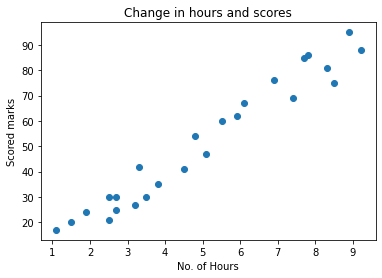

In [3]:
data.shape

plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("No. of Hours")
plt.ylabel("Scored marks")
plt.title("Change in hours and scores")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'], test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
coefficient = model.coef_
c = model.intercept_

line = (data['Hours'].values * coefficient) + c

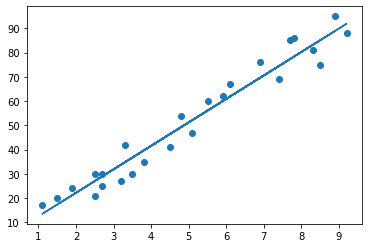

In [6]:
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, line)
plt.show()

In [10]:
pred = model.predict(X_test)
pred

pcomp = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pcomp

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [11]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994


In [12]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs in a day.")

92.38611528261494 will be predicted score if a student study for 9.25 hrs in a day.
